# TP long

In [1]:
try:
    import pandas,seaborn
except ModuleNotFoundError: 
    !pip3 install --quiet pandas
import numpy as np, matplotlib.pyplot as plt,pandas as pd,seaborn
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

## Jeu de données
L'objectif de ce jeu de données est de prédire une maladie rénale à partir de mesures effectuées sur des individus.
Les données ont été recueillies sur une période de deux mois en Inde et comportent 25 caractéristiques
1. Age(en années)
2. Pression sanguine (mm/Hg)
3. Densité (qualitative ordinale, parmi sg - (1.005,1.010,1.015,1.020,1)
4. Albumine (qualitative ordinale, parmi (0,1,2,3,4,5))
5. Sucre  (qualitative ordinale, parmi (0,1,2,3,4,5))
6. Globules rouge (qualitative nominale parmi (normal,abnormal))
7. Cellules Pus (qualitative nominale parmi (normal,abnormal))
8. Amas de cellules Pus (qualitative nominale parmi (présent,absent))
9. Bactérie (qualitative nominale parmi (présent,absent))
10. Glucose (mgs/dl)
11. Urée dans le sang (mgs/dl)
12. Créatinine (mgs/dl)
13. Sodium (mEq/L)
14. Potassium (mEq/L)
15. Hémoglobine (gms)
16. Volume cellulaire
17. Comptage globules blancs
18. Comptage globules rouge
19. Hypertension (qualitative nominale parmi (oui,non))
20. Diabète (qualitative nominale parmi (oui,non))
21. Maladie coronarienne (qualitative nominale parmi (oui,non))
22. Appetit (qualitative nominale parmi (normal,pauvre))
23. Oedeme (qualitative nominale parmi (oui,non))
24. Anémie (qualitative nominale parmi (oui,non))
25. Classe (malade : ckd, pas malade : notckd)d)

In [2]:
data = pd.read_csv('dataTP.csv')

In [3]:
data.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## 1. Analyse exploratoire

### Nettoyage des données
Les données, comme tout jeu de données réel, comporte de nombreuses imperfections :
- données manquantes (Nan) dans les données
- erreurs de lecture du fichier initial dans plusieurs colonnes (un '\t' est encore présent, comme par exemple dans la colonne `Classe`('ckd\t' à la place de 'ckd'))
- possiblement données aberrantes.

Il est de plus nécessaire de faire les pré-traitements habituels pour assurer une analyse de données pertinente :
- gestion des variables qualitatives
- normalisation
- gestion des variables entières / flottantes

Votre premier travail consiste donc à régler tous ces points pour obtenir un fichier de données propre. Vous devez donc mettre en jeu des techniques d'[imputation](https://scikit-learn.org/stable/modules/impute.html), de [normalisation](https://scikit-learn.org/stable/modules/preprocessing.html) ou encore de gestion de [données aberrantes](https://scikit-learn.org/stable/modules/outlier_detection.html).

### 1.1. Analyse univariée / bivariée
Vous explorerez ici les caractéristiques des variables (statistique univariée) et des relations entre couples de variables (statistiques bivariée) :
- [distribution des variables](https://seaborn.pydata.org/generated/seaborn.distplot.html), [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html),...
- [corrélations](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), [relations entre variables](https://seaborn.pydata.org/generated/seaborn.PairGrid.html),...

Vous en déduirez des actions à prendre sur ces variables (suppression d'une colonne, application d'une fonction mathématique à une colonne,...)

### 1.2. Sélection / extraction de variables
#### 1.2.1. Sélection de variables
Vous appliquerez ici les méthodes classiques de [sélection de variables](https://scikit-learn.org/stable/modules/feature_selection.html) sur les variables (éventuellement pré traitées par le point 1.1.) pour en extraire un jeu de données à $d<<25$ variables initiales à analyser.
#### 1.2.2. Extraction de variable
Vous analyserez le jeu de données (éventuellement pré traitées par le point 1.1.) à l'aide d'une [ACP](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) et en déduirez $d<<25$ nouvelles variables à analyser

### 2. Problème de classification
Le premier problème qui nous intéresse est de pouvoir construire un modèle de classification non supervisée et de comparer ses résultats à la "vraie" classification proposée dans le dernière colonne.
Vous construirez donc des modèles de [classification](https://scikit-learn.org/stable/modules/clustering.html) à partir des éléments vus en cours , optimiserez les paramètres de ces algorithmes (nombre de classes dans les k-means par exemple) et évaluerez leur performance.
Vous travaillerez d'une part sur les variables retenues par sélection de variables, et d'autre part sur les variables calculées par extraction de variables. Vous comparerez les résultats de classification obtenus.

### 3. Problème de régression
Le second problème concerne la [régression linéaire](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) d'une ou plusieurs des colonnes en fonction des autres régression. Vous vous intéresserez donc à :
- la régression simple de la colonne 12 en fonction des autres colonnes
- la régression multiple des colonnes 16, 17 et 18 en fonction des autres colonnes
 

In [5]:
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

for col in data.columns:
    expected_type = data[col].dtype
    for i, val in data[col].items():
        if not pd.isna(val):
            if expected_type == 'int64':
                if not isinstance(val, int):
                    data.at[i, col] = None
            elif expected_type == 'float64':
                if not isinstance(val, (int, float)):
                    data.at[i, col] = None
            elif expected_type == 'object':
                if not isinstance(val, str):
                    data.at[i, col] = None

for col in data.select_dtypes(include='object').columns:
        first_valid = data[col][data[col].notna() & (data[col] != '')].head(1)
        if not first_valid.empty:
            val = first_valid.iloc[0]
            try:
                int_val = int(val)
                data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')
            except ValueError:
                try:
                    float_val = float(val)
                    data[col] = pd.to_numeric(data[col], errors='coerce').astype(float)
                except ValueError:
                    pass


In [6]:
colonnes_numeriques = data.select_dtypes(include=[np.number]).columns

colonnes_numeriques = colonnes_numeriques[1:]

imputer = KNNImputer(n_neighbors=2)

data[colonnes_numeriques] = imputer.fit_transform(data[colonnes_numeriques])

data.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane classification  
0  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no            ckd  
1  ...  38.0  6000.0  5.5   no   no   no   good   no   no            ckd  
2  ...  31.0  7500.0  3.2   no  yes   no   poor   no  yes            ckd  
3  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes            ckd  
4  ...  35.0  7300.0  4.6   no   no   no   good   no   no            ckd  

[5 rows x 26 columns]

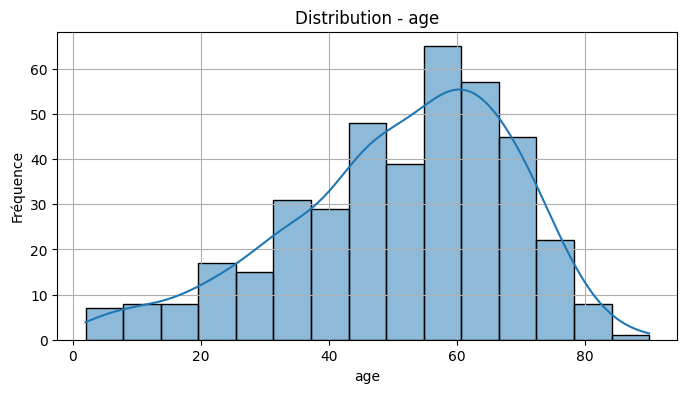

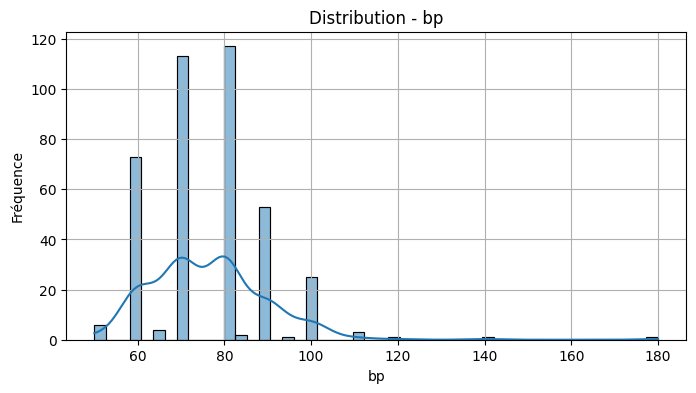

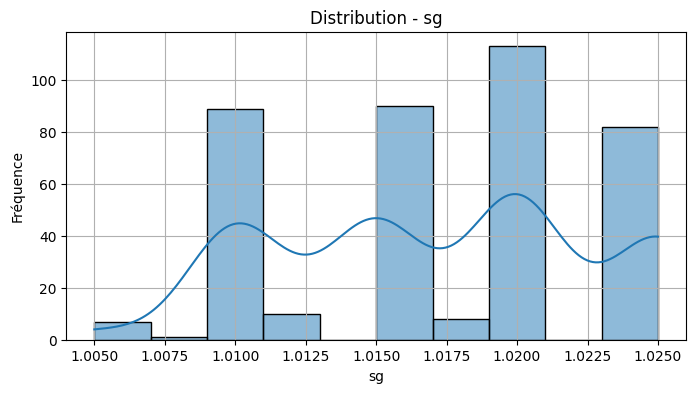

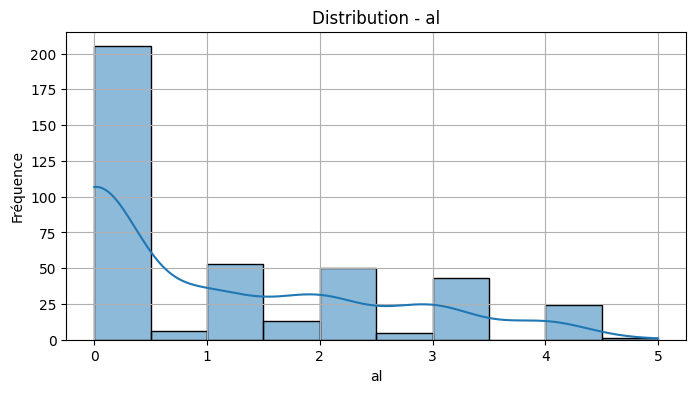

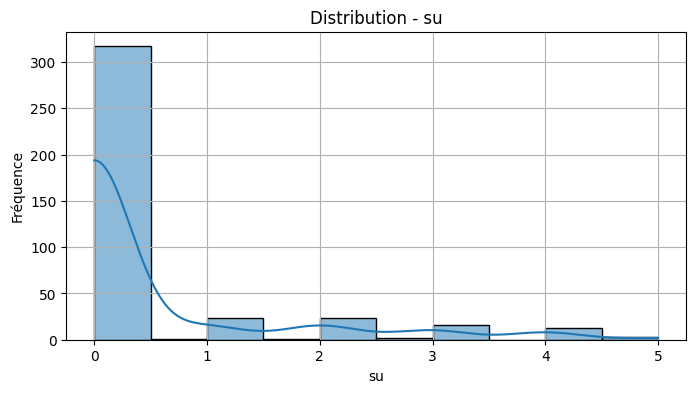

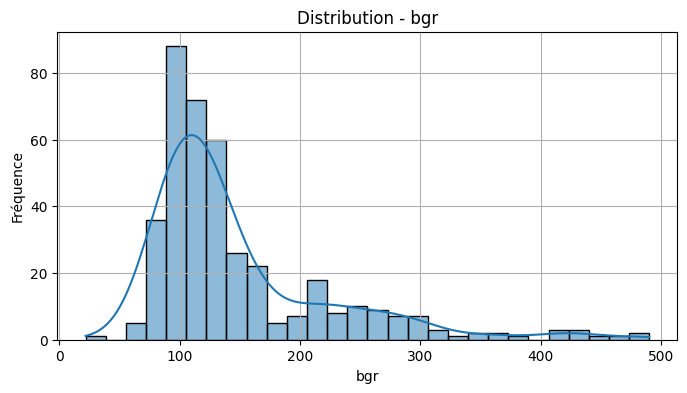

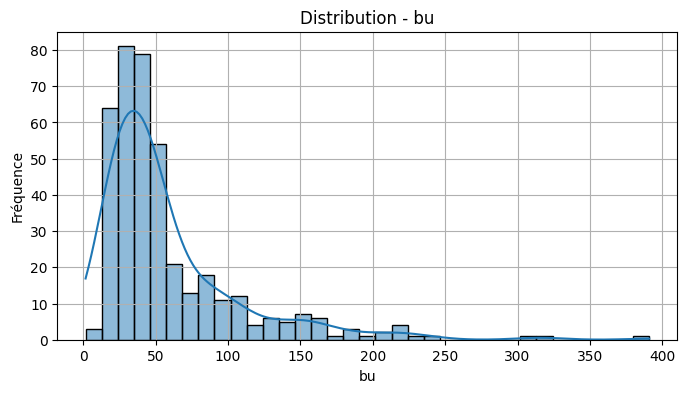

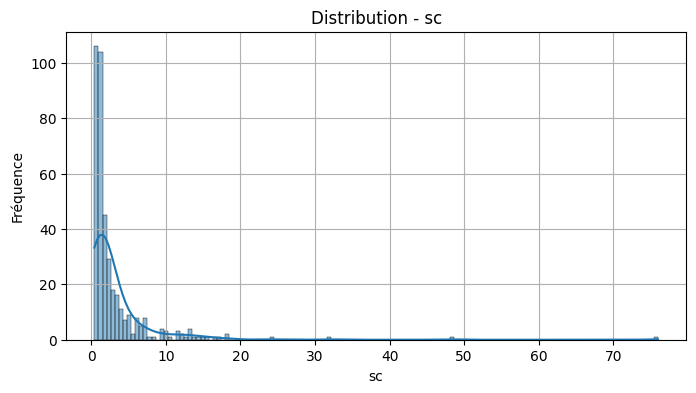

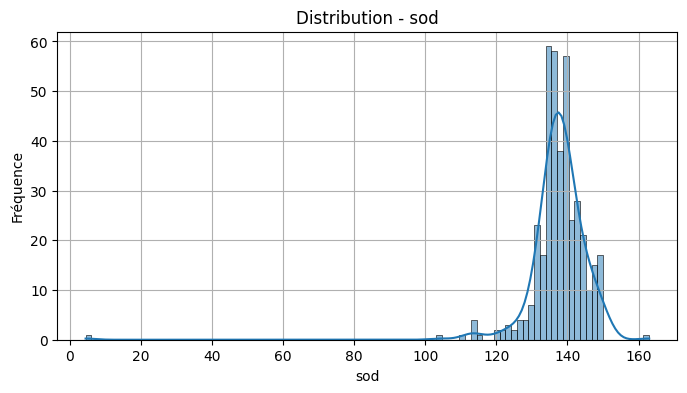

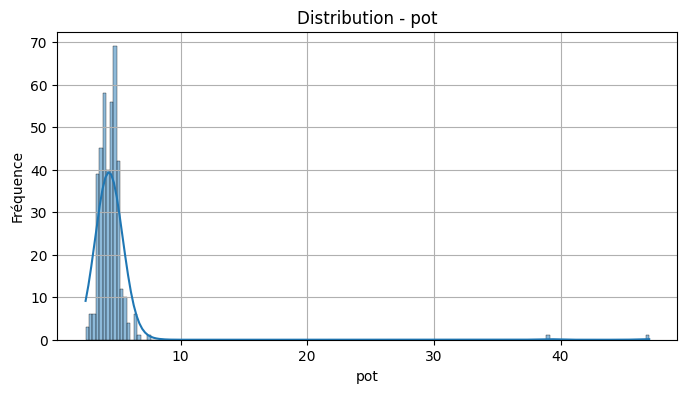

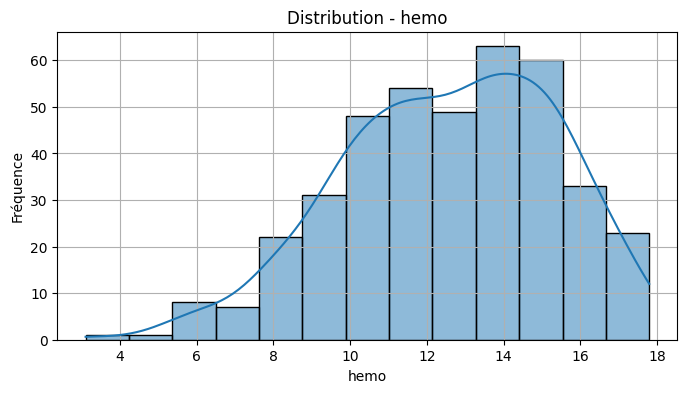

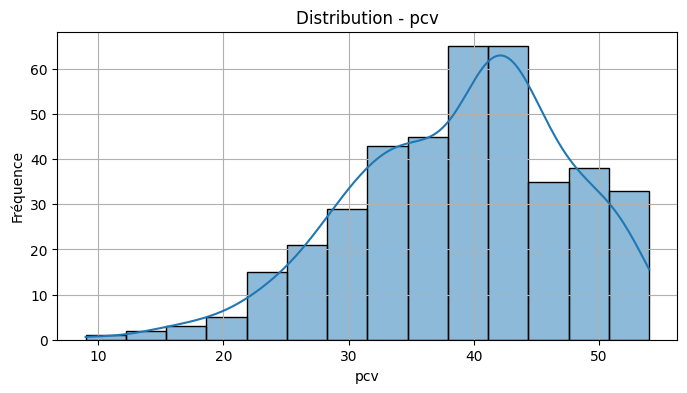

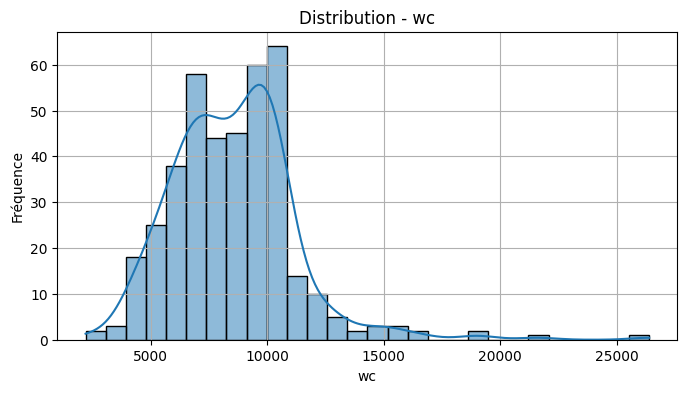

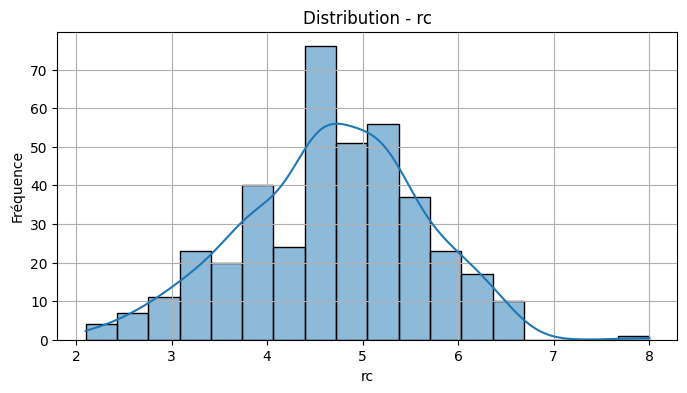

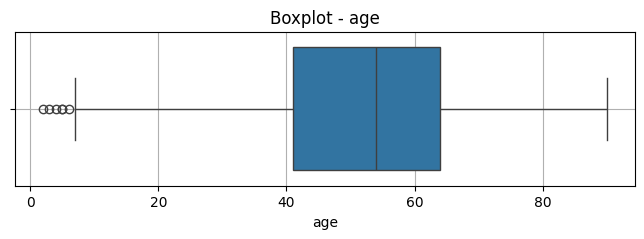

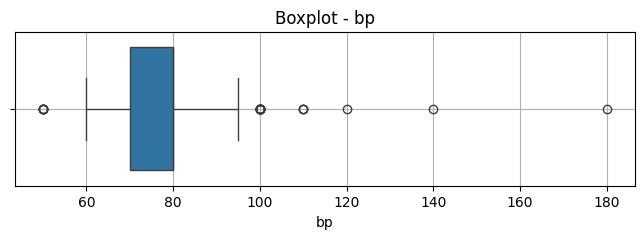

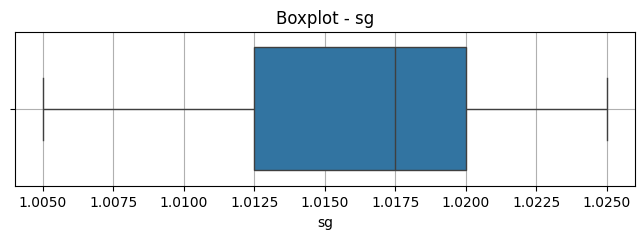

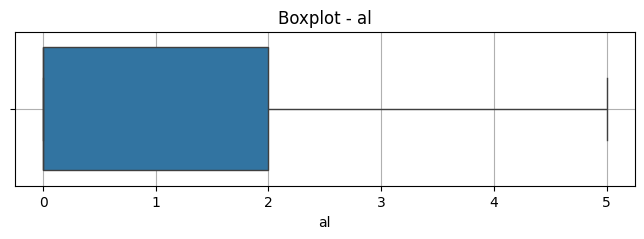

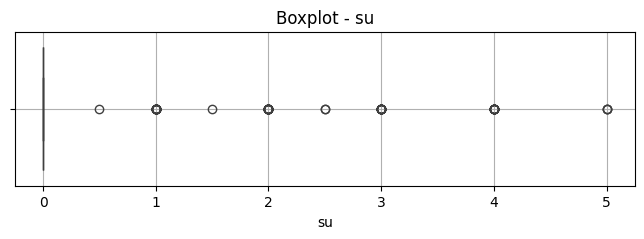

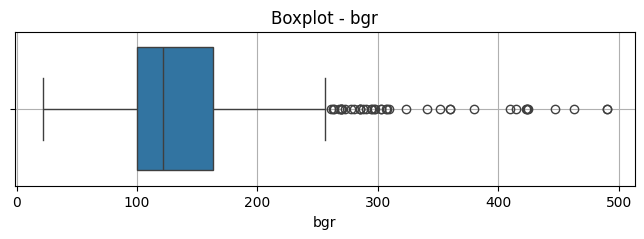

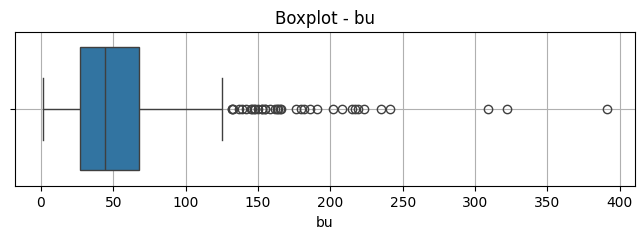

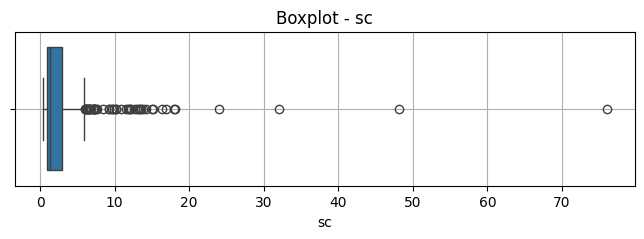

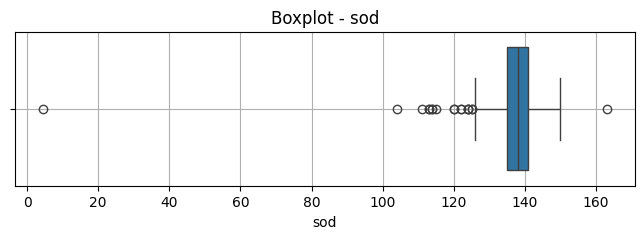

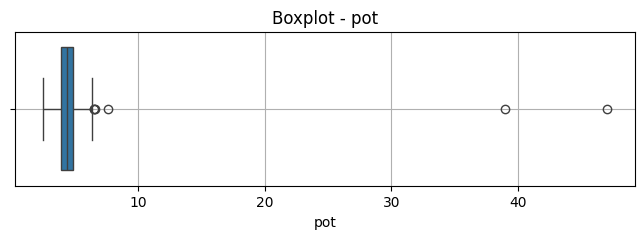

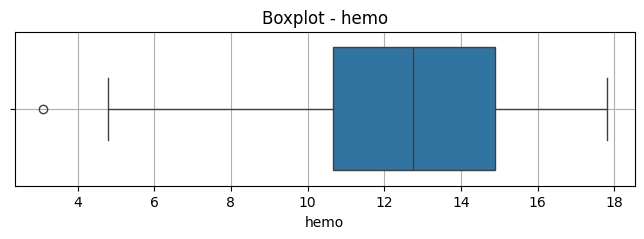

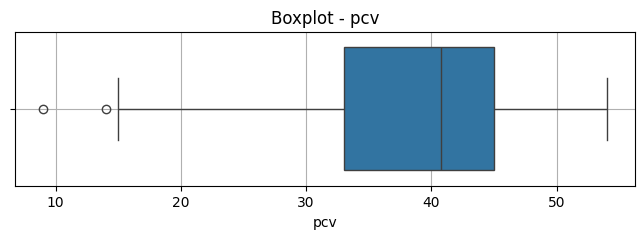

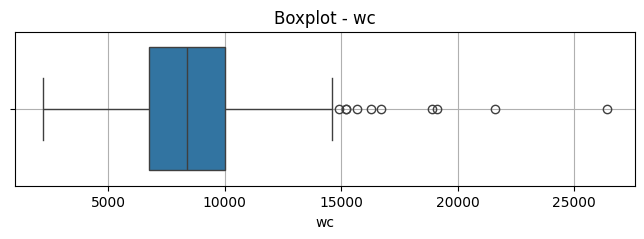

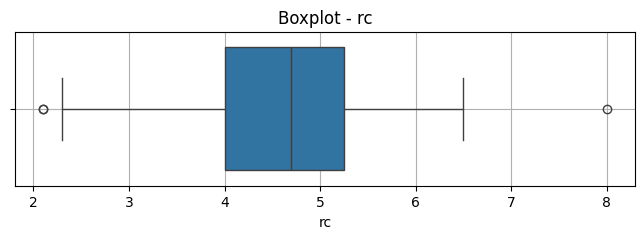

In [7]:
col = colonnes_numeriques[1]

for col in colonnes_numeriques:
    plt.figure(figsize=(8, 4))
    seaborn.histplot(data[col], kde=True)
    plt.title(f'Distribution - {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.show()

for col in colonnes_numeriques:
    plt.figure(figsize=(8, 2))
    seaborn.boxplot(x=data[col])
    plt.title(f'Boxplot - {col}')
    plt.grid(True)
    plt.show()

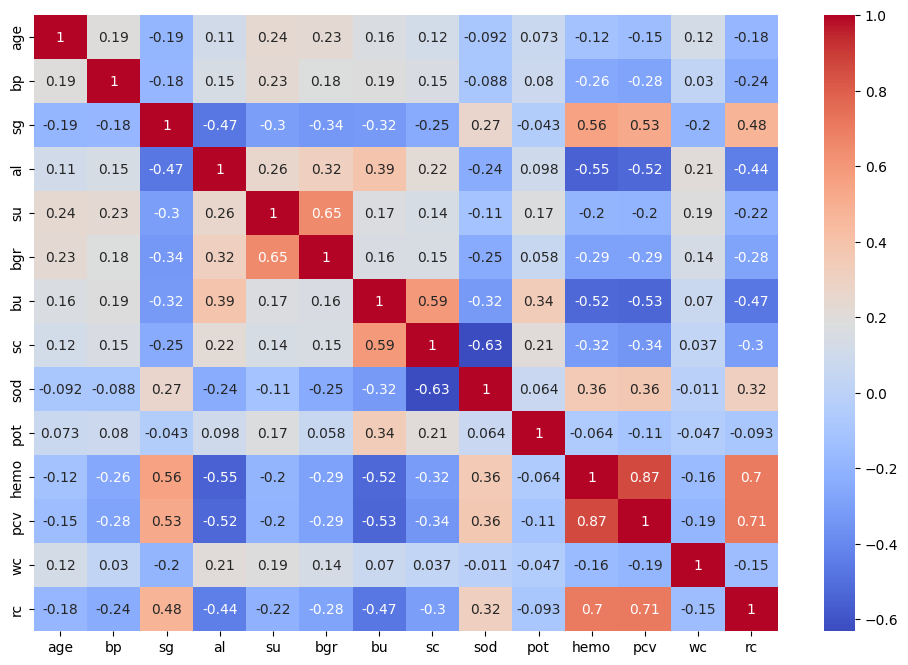

In [8]:
coor_matrix = data[colonnes_numeriques].corr()
plt.figure(figsize= (12, 8))
seaborn.heatmap(coor_matrix, annot=True, cmap='coolwarm')
plt.show()


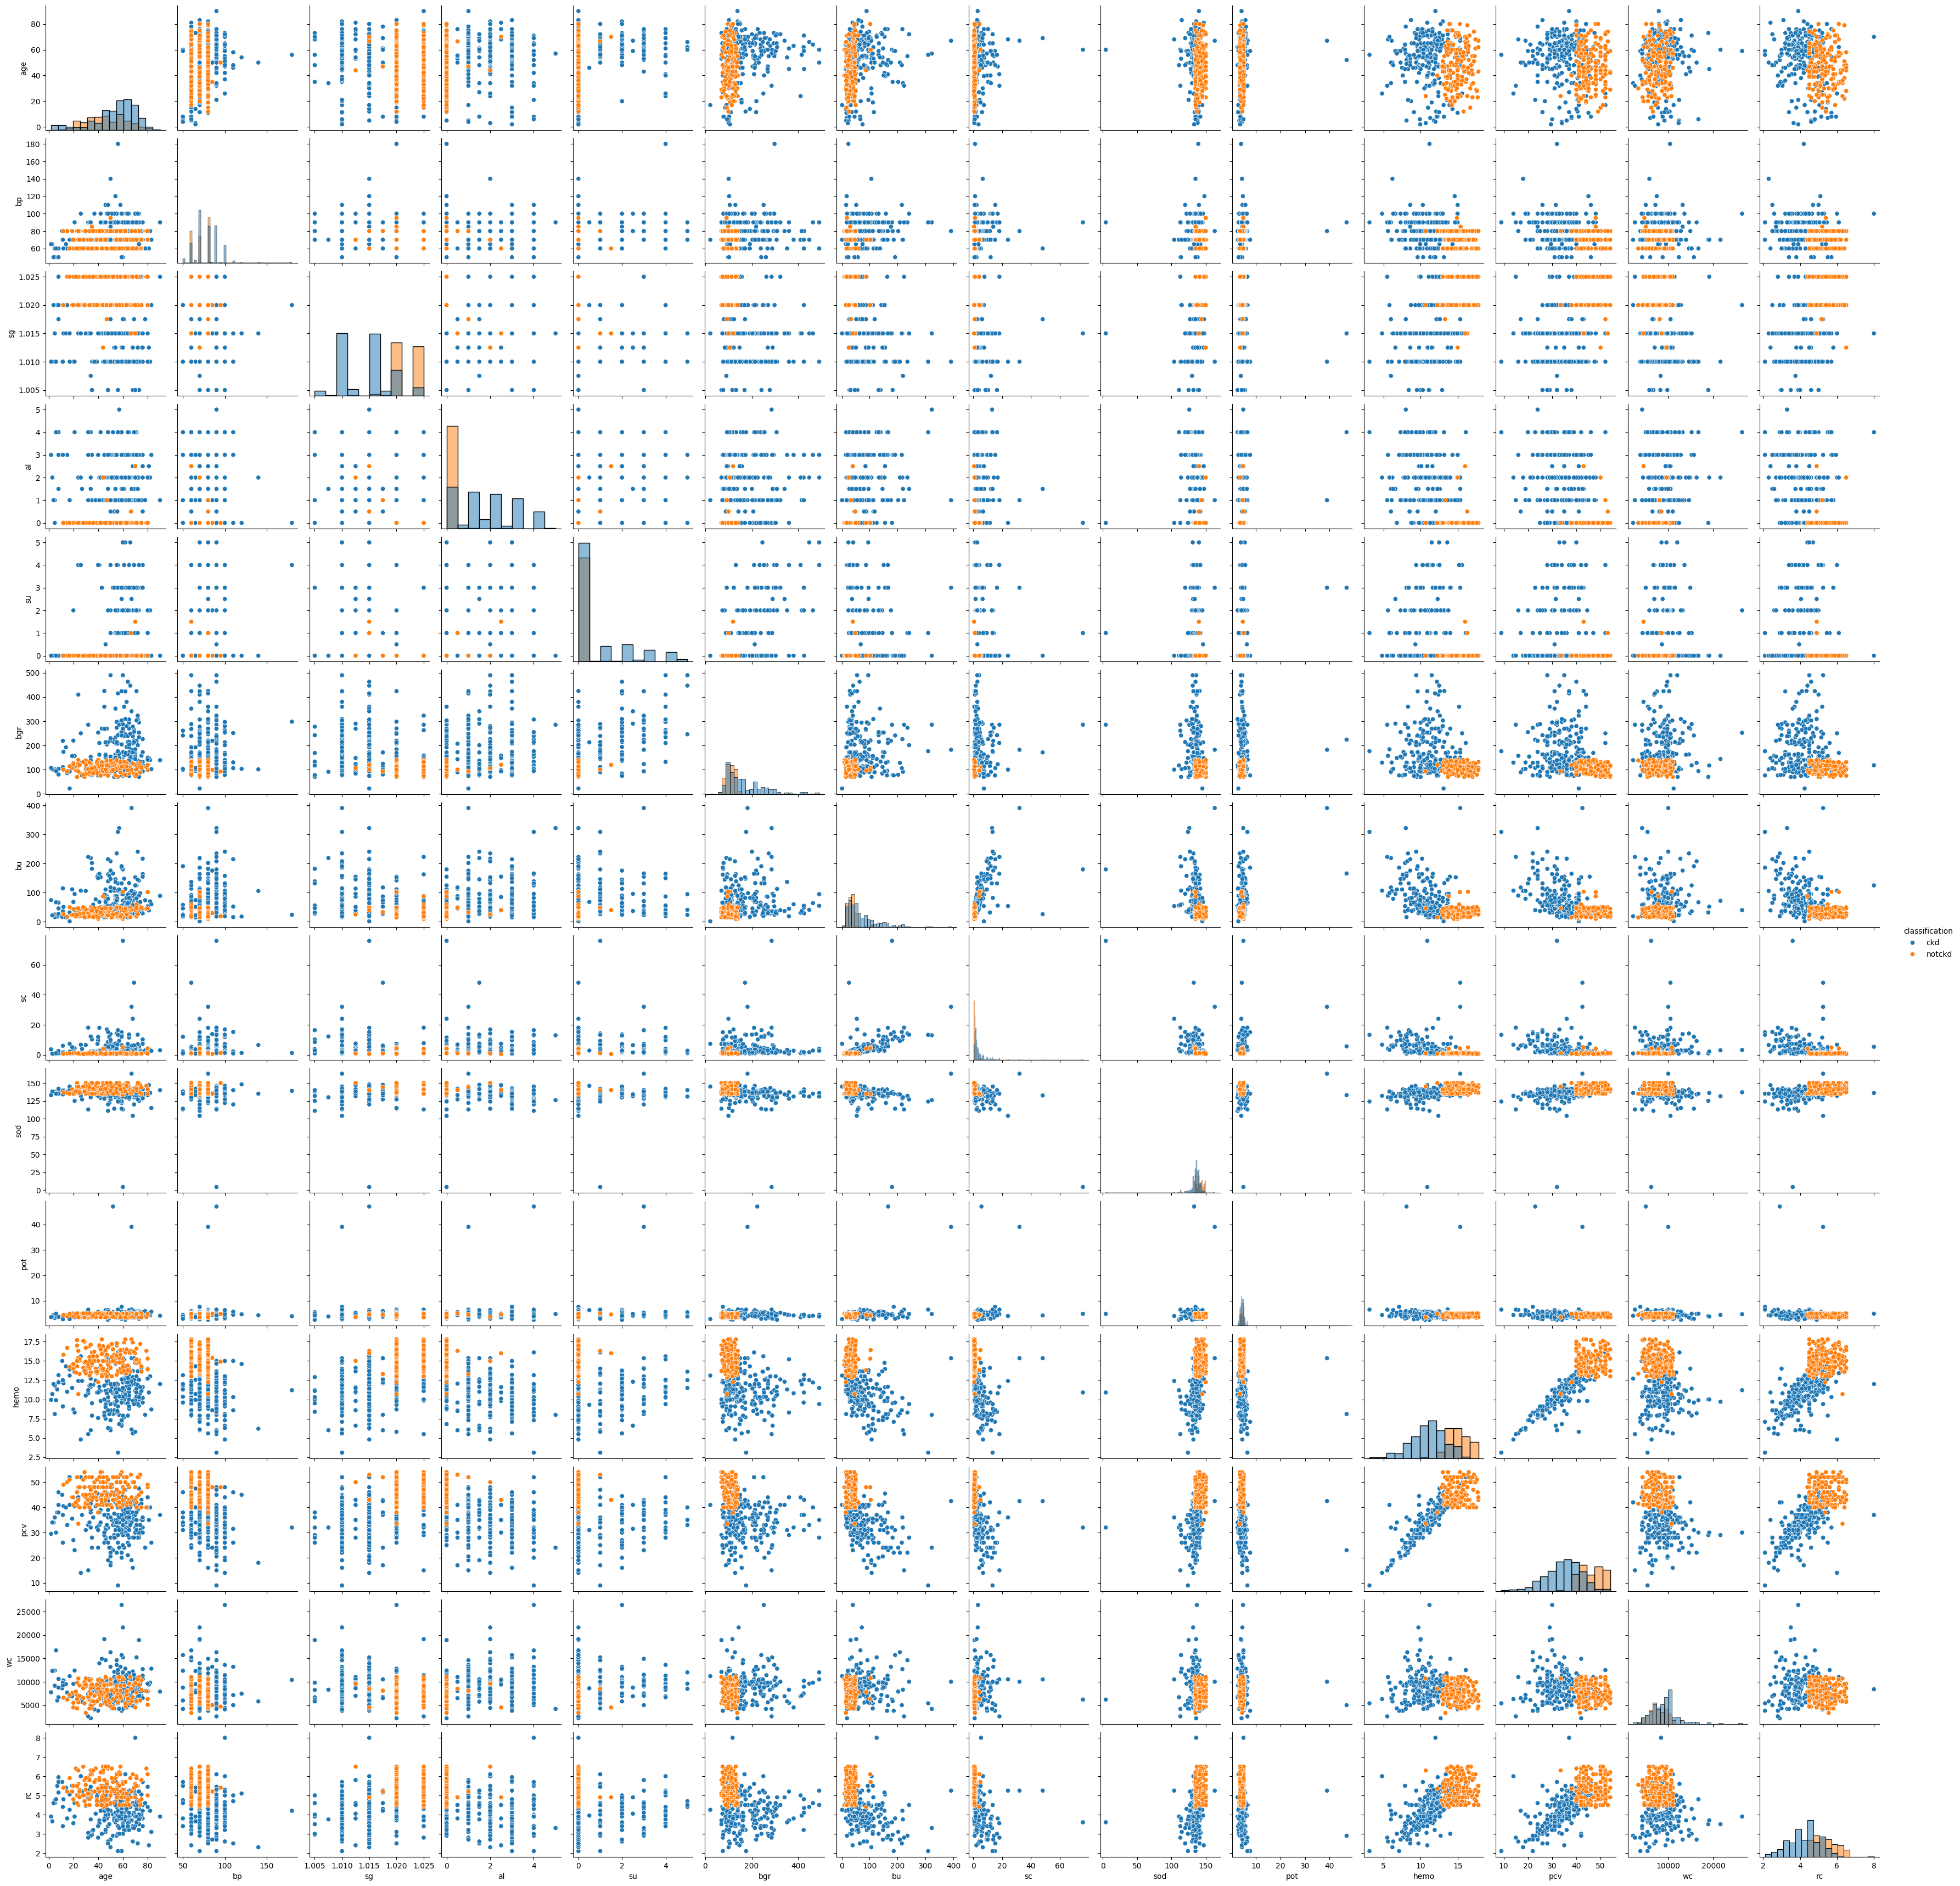

In [10]:
tab = []
for col in data.select_dtypes(include='float64').columns:
    tab.append(col)
    
tab.append('classification')
seaborn.pairplot(data[tab], hue='classification', diag_kind='hist')
plt.show()